In [1]:
# Standard
import numpy as np
import pandas as pd
from numpy.random import randn
from pandas import Series, DataFrame

# Stats
import math
import random
from scipy import stats

import sklearn
#from sklearn.model_selection import KFold

# Plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
#plt.style.use('ggplot')

# Command so that plots appear in the iPython Notebook
%matplotlib inline

# Time access and conversions
import time

### <font color='blue'> 1. Gnerate x = a sequence of points, y = sin(x)+a small random error;</font>

In [169]:
df = DataFrame(randn(400),columns=['x'])
df['sin_x'] = np.sin(df['x'])
df['a'] = DataFrame(np.random.randn(400))
df['y'] = df.sin_x + df.a
df.head()

,x,sin_x,a,y
0,0.076405,0.076331,0.434544,0.510875
1,2.636231,0.484124,-0.343739,0.140384
2,1.540915,0.999554,3.143697,4.143251
3,-1.626200,-0.998466,-0.010904,-1.009370
4,-0.485499,-0.466650,-1.151345,-1.617995


### <font color='blue'> 2. Draw a scatter plot of x and y </font>

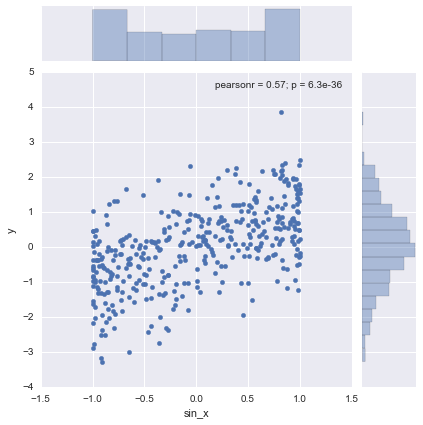

In [65]:
sns.jointplot(df.sin_x,df.y)

### <font color='blue'> 3. Run a linear regression model to predict y, using only one feature--x; print out the CV score of your model and the mathematical formula of your model; </font>


* 5-fold cross-validation on a dataset with 400 samples
* [Cross-validation: evaluating estimator performance](http://scikit-learn.org/stable/modules/cross_validation.html)

In [89]:
# Set up Y as target
Y = df.y
# Use v to make X two-dimensional
X = np.vstack(df.x)
X.shape

(400L, 1L)

In [90]:
# Import the cross alidation and linear regression
from sklearn import cross_validation
from sklearn.linear_model import LinearRegression

# Create linear regression object
linreg = LinearRegression()

# Train the model using the training sets
linreg.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [117]:
# 10-fold cross-validation for Linear Regression
scores = cross_validation.cross_val_score(linreg, X, Y, cv = 4)
#print "MSE=" +scores.mean() + "+/-" + scores.std()
#print("CV Scores: Mean = %s, std = %s" % (scores.mean(), scores.std()))
print("CV Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

CV Score: 0.25 (+/- 0.15)


In [129]:
# Obtaining predictions by cross-validation
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
predicted = cross_val_predict(linreg, X, Y, cv = 4)

slope, intercept, r_value, p_value, std_err = stats.linregress(Y, predicted)

# print out the mathematical formula of  model
info = "N= %2i,  Slope= %6.2f,  Intercept= %6.2f,  R2= %6.2f,  P_value= %6.2e"%\
  (len(Y),slope,intercept,r_value*r_value,p_value)

formula = "Y =  %6.2f + %6.2f * X"%\
  (intercept,slope,)

print formula
print info

Y =    0.02 +   0.25 * X
N= 400,  Slope=   0.25,  Intercept=   0.02,  R2=   0.24,  P_value= 5.42e-26


### <font color='blue'> 4. Draw a plot showing your predicted y, the real y, and ground truth--sin(x);</font>

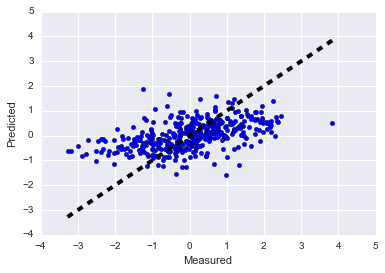

In [132]:
# Plot
fig, ax = plt.subplots()
ax.scatter(Y, predicted)
ax.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

### <font color='blue'> 5. Try to run a linear model using two features--x and x**2; print out CV score and mathematical formula;</font>

In [170]:
# create new feature x**2
df['x2'] = df.x ** 2
#df.drop(['sin_x','a'],inplace=True,axis=1)
df.head()

,x,sin_x,a,y,x2
0,0.076405,0.076331,0.434544,0.510875,0.005838
1,2.636231,0.484124,-0.343739,0.140384,6.949715
2,1.540915,0.999554,3.143697,4.143251,2.374419
3,-1.626200,-0.998466,-0.010904,-1.009370,2.644525
4,-0.485499,-0.466650,-1.151345,-1.617995,0.235710


In [178]:
# Set up Y as target
Y = df.y
# set up X 
X = df[['x','x2']]
X.head()

,x,x2
0,0.076405,0.005838
1,2.636231,6.949715
2,1.540915,2.374419
3,-1.626200,2.644525
4,-0.485499,0.235710


In [179]:
# 10-fold cross-validation for Linear Regression
scores = cross_validation.cross_val_score(linreg, X, Y, cv = 4)
#print "MSE=" +scores.mean() + "+/-" + scores.std()
#print("CV Scores: Mean = %s, std = %s" % (scores.mean(), scores.std()))
print("CV Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

CV Score: 0.25 (+/- 0.04)


In [180]:
# Obtaining predictions by cross-validation

predicted = cross_val_predict(linreg, X, Y, cv = 4)

slope, intercept, r_value, p_value, std_err = stats.linregress(Y, predicted)

# print out the mathematical formula of  model
info = "N= %2i,  Slope= %6.2f,  Intercept= %6.2f,  R2= %6.2f,  P_value= %6.2e"%\
  (len(Y),slope,intercept,r_value*r_value,p_value)

formula = "Y =  %6.2f + %6.2f * X"%\
  (intercept,slope,)

print formula
print info

Y =   -0.09 +   0.28 * X
N= 400,  Slope=   0.28,  Intercept=  -0.09,  R2=   0.26,  P_value= 1.14e-27


### <font color='blue'> 6. Try linear models with feature from x, to x, x2, x3,... x**15, and plot the training score and validation score showing what happens when feature set gets larger; Accoding to the result you get, what's the best number of features here;</font>

In [190]:
import graphlab

# create an empty SFrame using graphlab.SFrame() and make the column 'power_1' to be the first power of tmp (i.e. tmp itself).
tmp = np.array(df.x)

ex_sframe = graphlab.SFrame()
ex_sframe['power_1'] = tmp
print ex_sframe

+------------------+
|     power_1      |
+------------------+
| 0.0764048549441  |
|  2.63623128529   |
|  1.54091488205   |
|  -1.62619969009  |
| -0.485499339975  |
| -0.0755615464132 |
|  0.323483471027  |
|  0.331348480456  |
|  -1.90165571438  |
| 0.0439918421228  |
+------------------+
[400 rows x 1 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.


In [188]:
# Polynomial sframe function

def polynomial_sframe(feature, degree):
    # assume that degree >= 1
    # initialize the SFrame:
    poly_sframe = graphlab.SFrame()
    # and set poly_sframe['power_1'] equal to the passed feature
    poly_sframe['power_1'] = feature
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        # range usually starts at 0 and stops at the endpoint-1. We want it to start at 2 and stop at degree
        for power in range(2, degree+1): 
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # then assign poly_sframe[name] to the appropriate power of feature
            poly_sframe[name] = feature ** power
    return poly_sframe

In [191]:
print polynomial_sframe(tmp, 15)

+------------------+------------------+--------------------+-------------------+
|     power_1      |     power_2      |      power_3       |      power_4      |
+------------------+------------------+--------------------+-------------------+
| 0.0764048549441  | 0.00583770185903 | 0.000446028763746  | 3.40787629949e-05 |
|  2.63623128529   |  6.94971538952   |   18.3210571337    |   48.2985439953   |
|  1.54091488205   |  2.37441867373   |   3.65877707058    |   5.63786403817   |
|  -1.62619969009  |  2.64452543205   |   -4.30052643804   |   6.99351476076   |
| -0.485499339975  |  0.235709609117  |  -0.114436859652   |  0.0555590198299  |
| -0.0755615464132 | 0.00570954729636 | -0.000431422223033 | 3.25989303294e-05 |
|  0.323483471027  |  0.104641556028  |  0.0338498137575   |  0.0109498552479  |
|  0.331348480456  |  0.109791815501  |  0.0363793512326   |  0.0120542427509  |
|  -1.90165571438  |  3.61629445602   |   -6.87694701715   |   13.0775855926   |
| 0.0439918421228  | 0.00193

In [ ]:
# Polynomial sframe function

def polynomial_sframe(feature, degree):
    # assume that degree >= 1
    # initialize the SFrame:
    poly_sframe = graphlab.SFrame()
    # and set poly_sframe['power_1'] equal to the passed feature
    poly_sframe['power_1'] = feature
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        # range usually starts at 0 and stops at the endpoint-1. We want it to start at 2 and stop at degree
        for power in range(2, degree+1): 
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # then assign poly_sframe[name] to the appropriate power of feature
            poly_sframe[name] = feature ** power
    return poly_sframe

### <font color='blue'> 7. download a .xlsx file with multiple sheets and read them all into pandas dataframe</font>